# Finding the Most Environmentally Friendly Neighborhood In Pittsburgh
Hello everyone! Our task for this project was to make a data-driven argument to determine the best neighborhood in Pittsburgh. We used data from the Western Pennsylvania Regional Data Center (WPRDC) and we could use whatever metrics we wanted to rate the neighborhoods. 

To come up with our metric, we first explored the WPRDC webpage for Pittsburgh-related datasets that had a 'neighborhood' column. Many datasets, from non-traffic citations to fire incidents, had this column, making it extremely hard to decide on which data to use. However, a dataset of *every* tree in Pittsburgh caught our eye, as we thought it would be a fun challenge to work with a dataframe with over 45,000 entries! We decided to continue with the environmental theme and make our metric "Environmental Friendliness". How did we determine that, you ask? Read on...

### Smart Trash in Pittsburgh

In [75]:
import pandas as pd
import geopandas
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

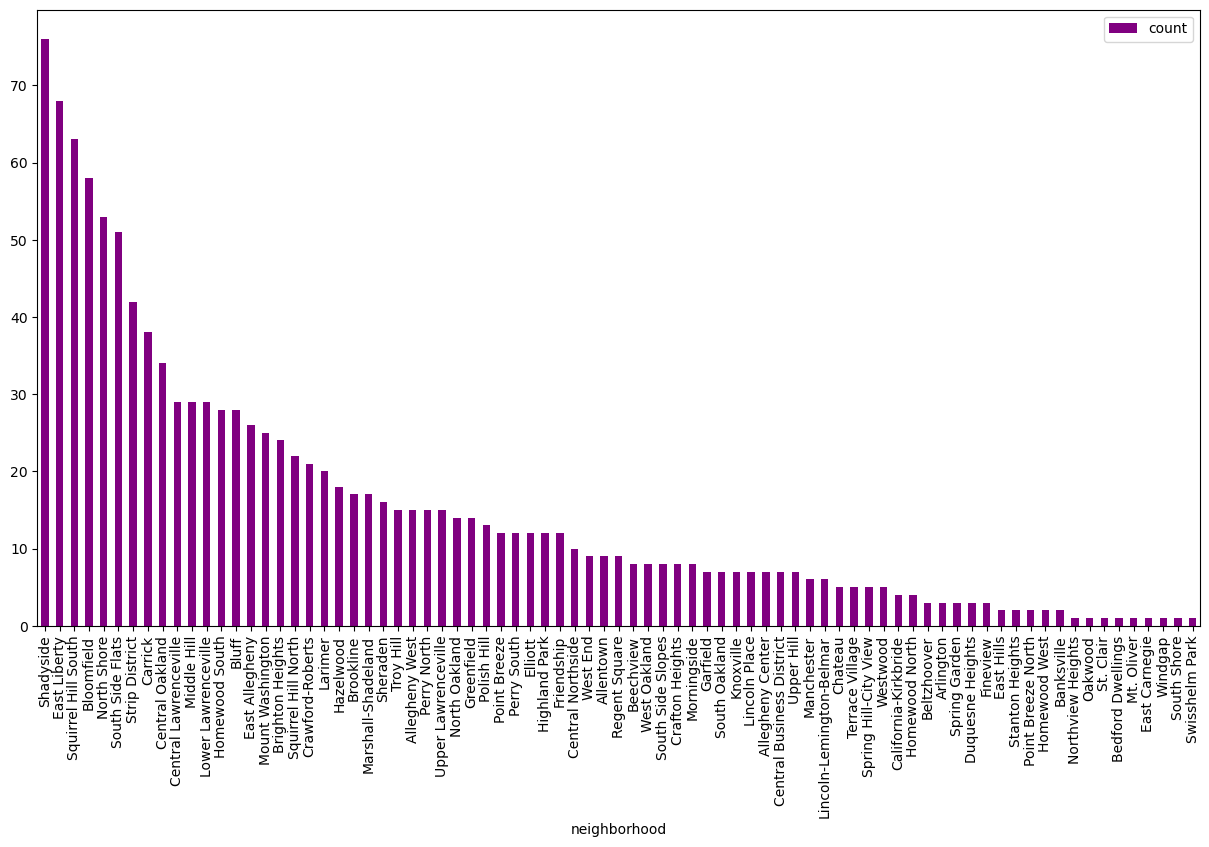

In [77]:
smart_trash_pandas = pd.read_csv("smart_trash_containers.csv")
smart_trash = smart_trash_pandas["neighborhood"].value_counts().sort_values(ascending=False)

smart_trash.plot(kind="bar", figsize=(15,8), color="purple")
plt.legend(bbox_to_anchor=(1,1))

neighborhoods = geopandas.read_file("Neighborhoods_.shp")

### What this data tells us
This data tells us that Shadyside has the largest number of smart trash containers, with East Liberty having the second largest amount of smart trash containers and Squirrel Hill South in third place. Smart trash containers are trash bins that implement sensors and sorting technologies to send analyitics to waste management, helping the recycling effort and preventing waste we can reuse go to the landfill. With this in mind, we can conclude that Shadyside is the most likely neighborhood to recycle its waste! 

### How the results compare to my personal favorite neighborhood, East Liberty
Personally I have never been to Shadyside, but I have been to East Liberty and seen all the changes that have been made over the years. The neighborhood used to be a lot less safe and not a good neighborhood to be in, but it has been shocking to see how much of an improvement they have been making, especially with going out of their way to make so many smart trash containers! Viewing the next topic, waste recovery, we can even see that East Liberty ranks third there, too. While East Liberty did not win first place in smart trash containers, I am proud of it reaching second place.

### Waste Recovery

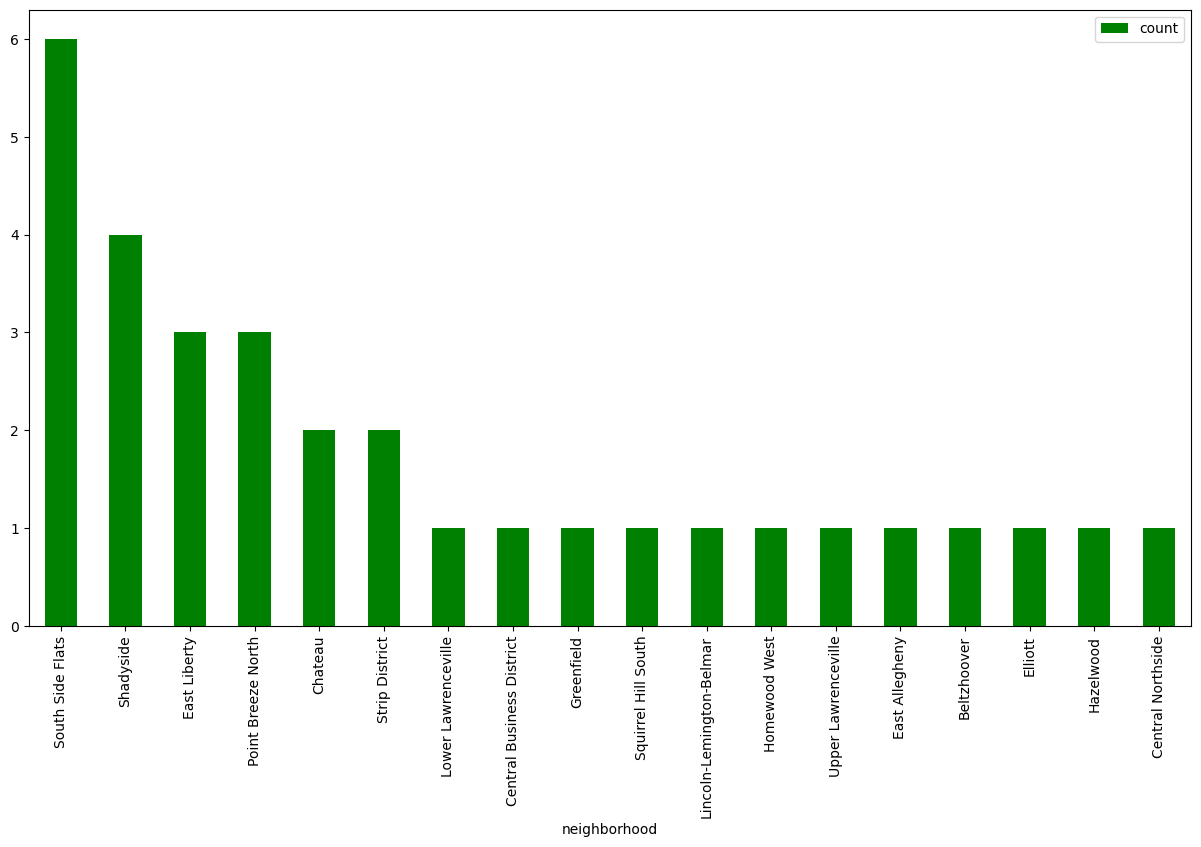

In [79]:
garb = pd.read_csv('waste_recovery_locations.csv') 
neighborhood_count = garb["neighborhood"].value_counts().sort_values(ascending=False)

neighborhood_count.plot(kind="bar", figsize=(15,8), color="green")
plt.legend(bbox_to_anchor=(1,1))

### Conclusion for Waste Recovery
A waste recovery location is a specific spot where people can drop off their recycling for it to be reused and repurposed. The data on the graph shows that South Side Flats has the largest number for waste recovery locations totaling at 6, the second highest is shadyside totaling to 4. Most of the neighborhoods following have less and less, with most having only one waste recovery location. 

### Dollar Value of Trees

Text(0.5, 1.0, 'Total Dollar Value Gained From Trees in Pittsburgh by Neighborhood')

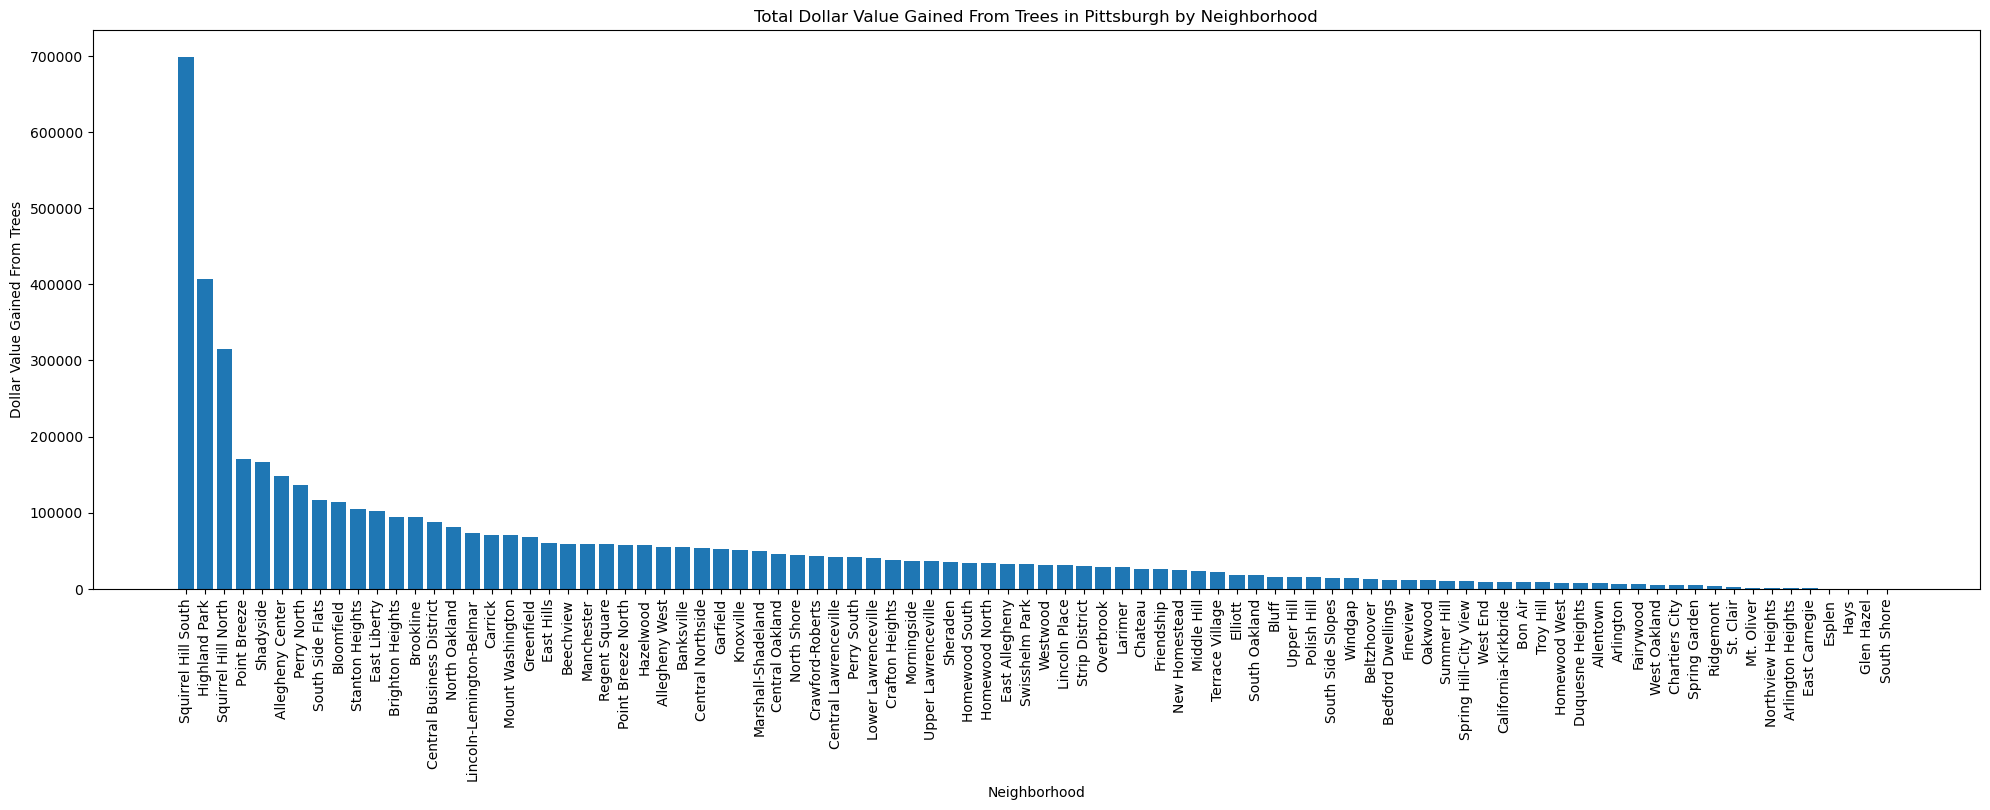

In [81]:
trees = pd.read_csv('trees.csv', low_memory=False)
neighborhood_dollar_value_from_trees = trees.groupby('neighborhood')['overall_benefits_dollar_value'].sum().reset_index()
dollar_values_sorted = neighborhood_dollar_value_from_trees.sort_values('overall_benefits_dollar_value', ascending=False)

plt.figure(figsize=(20,8))
plt.bar(dollar_values_sorted['neighborhood'], dollar_values_sorted['overall_benefits_dollar_value'])
plt.xlabel('Neighborhood')
plt.ylabel('Dollar Value Gained From Trees')
plt.xticks(rotation=90)
plt.tight_layout()
plt.title('Total Dollar Value Gained From Trees in Pittsburgh by Neighborhood')


### Conclusion for Dollar Value
The total dollar value gained from a tree is calculated from its environmental benefits, such as air quality and stormwater drainage, as well as monetary benefits like the property value it provides. Overall, the neighborhoods with the most total dollar value gained from trees cover the most park area. (Proof=Squirrel Hill South contains nearly all of Schenley and Frick park, and the neighborhood in second is Highland Park.) This directly corresponds to how environmentally friendly a neighborhood is. 

## Final Conclusion: So What's the Best Overall Neighborhood?
Plotting the values for all three datasets (scaling them to ensure that each one would fairly contribute to the overall result):

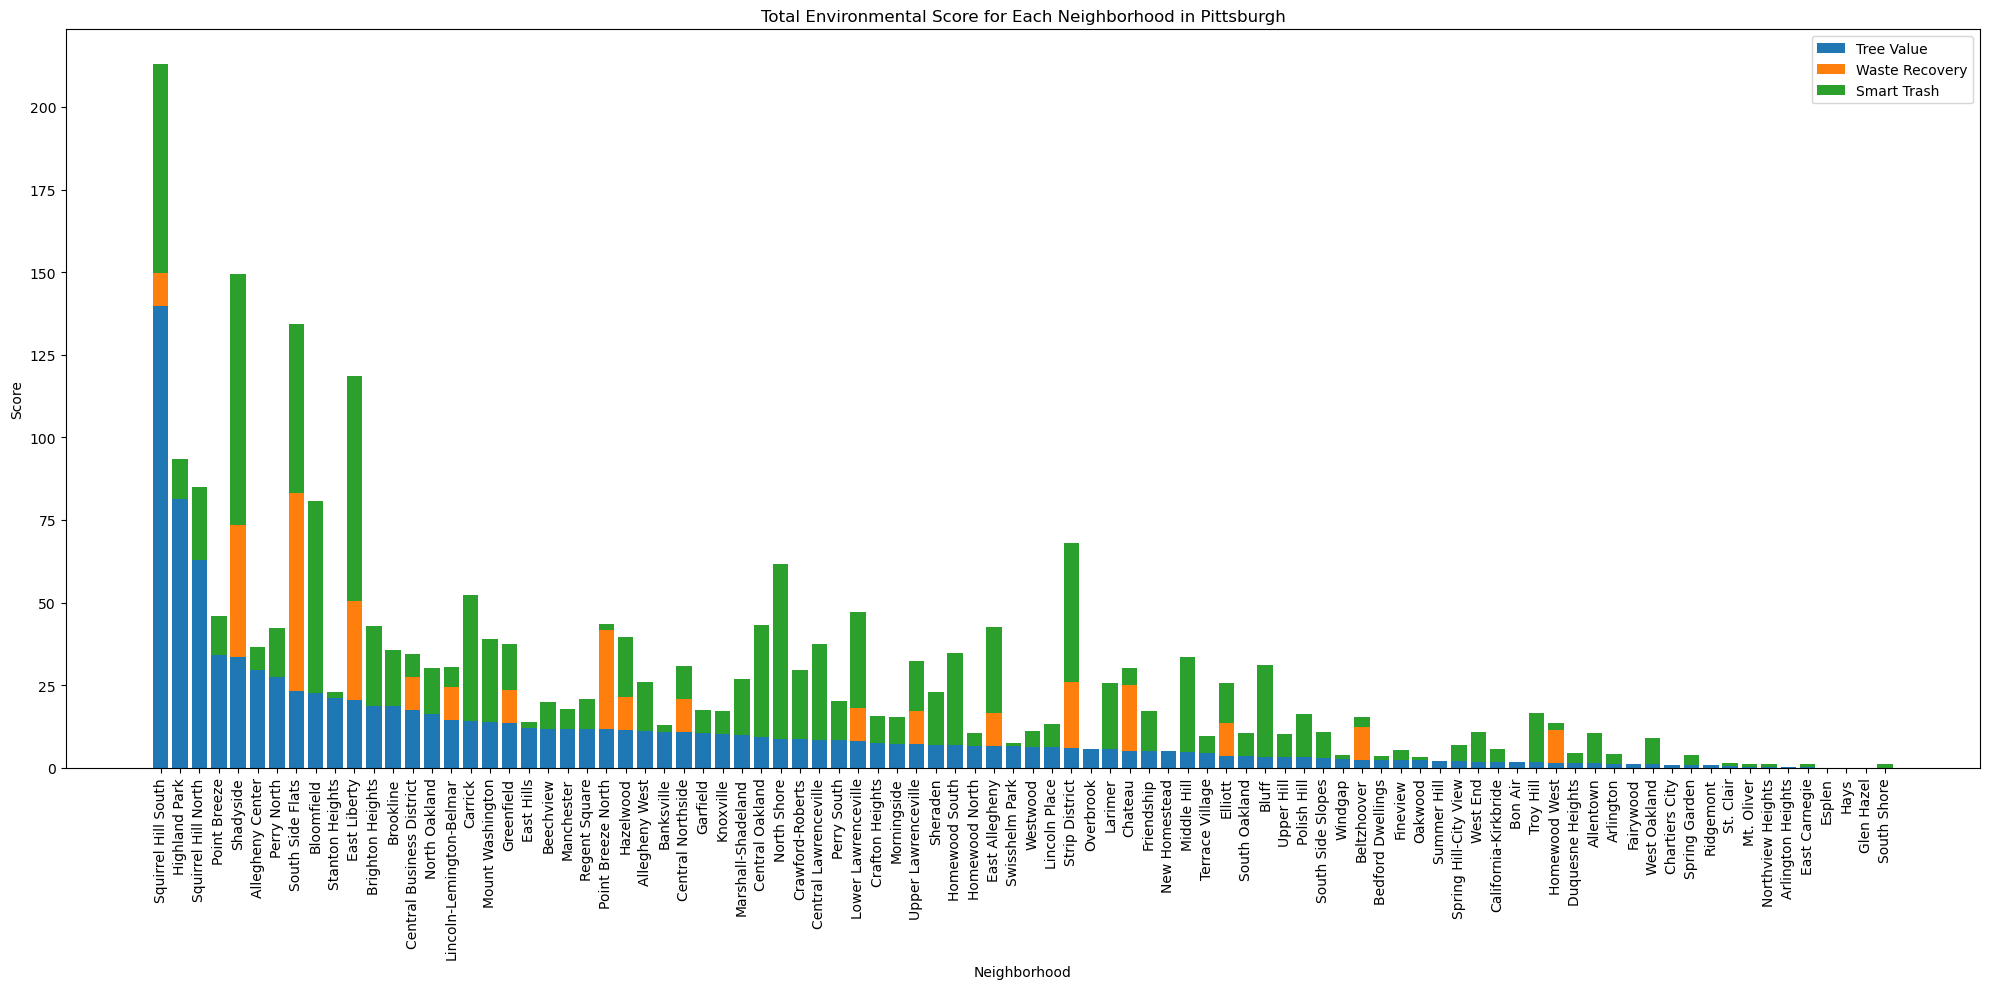

In [164]:
dollar_value_scaling_factor = 0.0002
waste_recovery_scaling_factor = 10

neighborhoods = dollar_values_sorted['neighborhood']
scaled_values = dollar_values_sorted['overall_benefits_dollar_value'] * dollar_value_scaling_factor

# Fixing indexing of dollar_values_sorted dataset because it was
# created using a different method than the other two
tree_values = pd.DataFrame({
    'neighborhood': neighborhoods, 
    'value': scaled_values
}).set_index('neighborhood')['value']

# Reindex the smaller datasets to include a placeholder index for each neighborhood in order to
# line up on the graph
waste_recovery = neighborhood_count.reindex(neighborhoods, fill_value=0) * waste_recovery_scaling_factor
smart_trash = smart_trash.reindex(neighborhoods, fill_value=0)

plt.figure(figsize=(20,10))
plt.bar(neighborhoods, tree_values, label='Tree Value')
plt.bar(neighborhoods, waste_recovery, bottom=tree_values, label='Waste Recovery')
#Make sure the bottom of the third bar takes into account the cumulative sum of the first two
plt.bar(neighborhoods, smart_trash, bottom=[i+j for i,j in zip(tree_values, waste_recovery)], label='Smart Trash')

plt.xlabel('Neighborhood')
plt.ylabel('Score')
plt.title('Total Environmental Score for Each Neighborhood in Pittsburgh')
plt.xticks(rotation=90)
plt.legend()
plt.tight_layout()

plt.show()

#### Squirrel Hill South takes the victory! Here's what we all have to say:

Kai: Personally, I am in full agreement with our result. I visit Squirrel Hill South the most out of any neighborhood in Pittsburgh, usually to enjoy the nature in Schenley or Frick Park. I also have a special bond with the neighborhood as it was the first one I ever explored by bike. It is beautiful and well kept. There might also be some bias present as I was the one who chose the trees dataset which Squirrel Hill South won.

Raunak: We used a specific formula to quantify a value for each of our sets of data and totaled them up for each neighborhood. We found that the Squirrel Hill south side is the winner, and the neighborhood we deem as the best from an environmentally friendly standpoint. Places Like Shadyside and South Side Flats both also had very strong scores, but Squirrel Hill South Side was the highest. Personally I prefer ShadySide since they have more waste recovery places. We can see from the data that many neighborhoods are not nearly as environmentally friendly as the top few in each category. There is a heavy drop off in each category after just the first few neighborhoods in each dataset. I think this is an important sign to all the people and the neighborhoods out there that we need to make an effort to improve our neighborhoods by making them more environmentally friendly in as many ways as possible.  

Tiberius: 